In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

import seaborn as sns; sns.set()


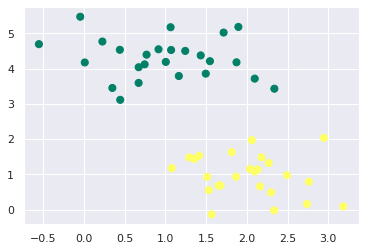

In [8]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 50, centers = 2, random_state=0, cluster_std =0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

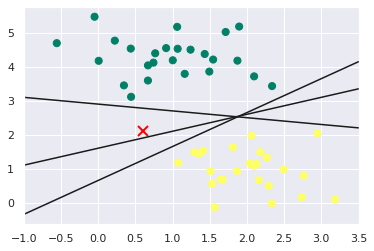

In [10]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  plt.plot(xfit, m*xfit+b, '-k')

  plt.xlim(-1, 3.5)





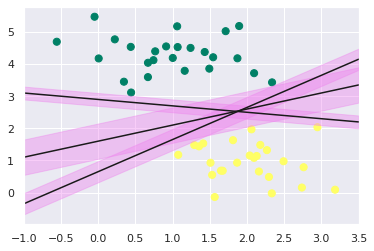

In [14]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

for m,b,d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
  yfit = m* xfit + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'blue', color='violet', alpha=0.4)
   
plt.xlim(-1, 3.5);



In [15]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
def plot_svc_decision_function(model, ax=None, plot_support=True):

  if ax is None:
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()


    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)


  ax.contour(X, Y, p, color='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--'])


  if plot_support:

    ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=100, linewidth=1, facecolors='red');


  ax.set_xlim(xlim)
  ax.set_ylim(ylim)


    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'color'
  app.launch_new_instance()


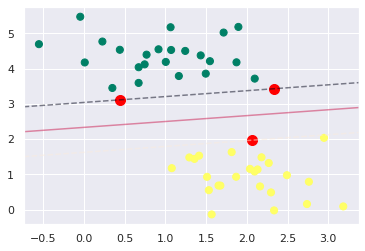

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model);

In [25]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [28]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


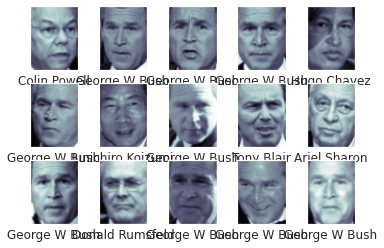

In [31]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [0]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)
                                    

In [37]:
from sklearn.model_selection import learning_curve, GridSearchCV

param_grid = {'svc__C': [1,5,10,50], 'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 7s, sys: 16.2 s, total: 1min 23s
Wall time: 50.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [0]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

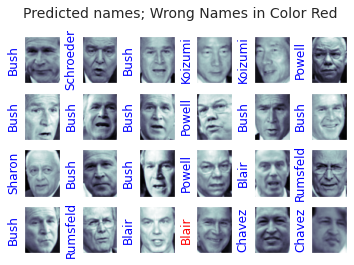

In [49]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='blue' if yfit[i] == ytest[i] else 'red')

  fig.suptitle('Predicted names; Wrong Names in Color Red', size = 14);


In [52]:
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



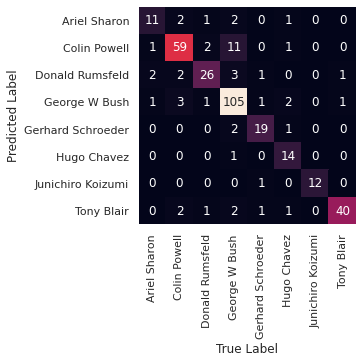

In [54]:
from sklearn.metrics import confusion_matrix
matri = confusion_matrix(ytest, yfit)
sns.heatmap(matri.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');